# **Analyzing Personal Expense Behavior Using GCash Transaction Data**

### **Project Context**

This project examines one year of personal GCash expense transactions to understand spending behavior, category distribution, and temporal patterns. By analyzing expense amounts, transaction frequency, and spending categories, the study aims to identify how daily digital payments and high-value financial obligations influence overall spending patterns.

Expense categories were derived from transaction descriptions using keyword-based classification. Expense amounts represent financial outflows, while time-based variables enable trend and behavioral analysis. The findings provide insight into personal financial habits and demonstrate how digital wallet data can support improved financial awareness and budgeting decisions.

---

### **Research Questions**
- Which spending categories account for the highest total expenses?
- How frequently do expense transactions occur within each category?
- How do personal expenses change over time?
- What patterns can be observed in overall spending behavior?
- Are there significant differences or relationships in spending behavior across categories and time periods?

---

### **General Objective**

To analyze personal GCash expense transactions over a one-year period in order to identify spending patterns, behavioral trends, and statistical differences in spending behavior.

---

### **Specific Objectives**
- To categorize expense transactions into meaningful spending groups.
- To identify spending categories with the highest total expenditure.
- To measure the frequency of expense transactions per category.
- To analyze monthly trends in personal expenses.
- To summarize overall expense behavior using descriptive statistics.
- To examine differences and relationships in spending behavior using statistical analysis.

---

### **Hypothesis 1: Weekday vs Weekend Spending**

H₀₁: There is no significant difference between weekday and weekend expense amounts.

H₁₁: There is a significant difference between weekday and weekend expense amounts.

---

### **Hypothesis 2: Differences Across Spending Categories**

H₀₂: There is no significant difference in mean expense amounts across spending categories.

H₁₂: At least one spending category has a significantly different mean expense amount.

---

### **Analytical Approach**

The study applies:

- Exploratory Data Analysis (EDA)
- Descriptive statistics
- Time-series analysis
- Independent samples t-test
- Analysis of variance (ANOVA)
- Correlation analysis
- Data visualization techniques

---

### **Expected Insight**

The analysis aims to determine whether frequent small expenses or infrequent high-value payments contribute more significantly to overall spending, and whether spending behavior varies across time and categories.

# Data Collection

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind
from scipy.stats import f_oneway

In [69]:
df = pd.read_csv('personal_gcash_transaction.csv')

df.head(5)

,Date and Time,Description,Reference No.,Debit,Credit,Balance
0,2/2/2025 15:58,STARTING BALANCE,NaN,NaN,426.82,426.82
1,2/2/2025 15:59,Transfer from My_Number to Others_Number,3.025310e+12,200.00,NaN,226.82
2,2/4/2025 10:21,"Received GCash from BDO Unibank, Inc. with acc...",NaN,NaN,1000.00,1226.82
3,2/4/2025 10:21,Payment to MLBB,6.083661e+08,94.05,NaN,1132.77
4,2/4/2025 10:22,Payment to MLBB,4.015909e+08,94.05,NaN,1038.72


# Preliminary Exploratory Data Analysis

In [70]:
df.columns

Index(['Date and Time', 'Description', 'Reference No.', 'Debit', 'Credit',
       'Balance'],
      dtype='object')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Time  255 non-null    object 
 1   Description    255 non-null    object 
 2   Reference No.  242 non-null    float64
 3   Debit          174 non-null    float64
 4   Credit         81 non-null     float64
 5   Balance        255 non-null    float64
dtypes: float64(4), object(2)
memory usage: 12.1+ KB


In [72]:
df.isna().sum().sort_values(ascending=False)


Credit           174
Debit             81
Reference No.     13
Date and Time      0
Description        0
Balance            0
dtype: int64

In [73]:
df.loc[
    df.duplicated(subset="Reference No.", keep=False) &
    df['Reference No.'].notna()
]

,Date and Time,Description,Reference No.,Debit,Credit,Balance
21,2/21/2025 11:48,Transfer from Others_Number to My_Number,1.025960e+12,NaN,125.0,387.72
22,2/21/2025 11:49,Transfer from Others_Number to My_Number,1.025960e+12,NaN,5.0,392.72
64,5/26/2025 17:11,Transfer from My_Number to Others_Number,3.029060e+12,3800.0,NaN,295.12
65,5/26/2025 17:13,Transfer from My_Number to Others_Number,3.029060e+12,30.0,NaN,265.12
90,7/10/2025 20:28,"Received GCash from BDO Unibank, Inc. with acc...",3.030530e+12,NaN,2000.0,3028.95
91,7/10/2025 20:32,Transfer from My_Number to Others_Number,3.030530e+12,2000.0,NaN,1028.95
96,7/14/2025 16:12,"Received GCash from BDO Unibank, Inc. with acc...",3.030650e+12,NaN,4000.0,4921.35
97,7/14/2025 16:13,Transfer from My_Number to Others_Number,3.030650e+12,3800.0,NaN,1121.35
100,7/27/2025 15:46,Transfer from My_Number to Others_Number,3.031070e+12,150.0,NaN,596.35
101,7/27/2025 18:43,Transfer from My_Number to Others_Number,3.031070e+12,260.0,NaN,336.35


In [74]:
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date and Time,255,247,2/4/2025 10:21,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,255,53,"Received GCash from BDO Unibank, Inc. with acc...",54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reference No.,242.0,NaN,NaN,NaN,1379090919311.152832,1861651919622.431152,4220364.0,358976143.75,816502492.0,3032090000000.0,9036920000000.0
Debit,174.0,NaN,NaN,NaN,925.948621,3157.338938,10.64,86.0,161.235,491.04,26523.6
Credit,81.0,NaN,NaN,NaN,1993.738519,4572.411133,5.0,200.0,700.0,1640.0,26600.0
Balance,255.0,NaN,NaN,NaN,1134.437725,2738.586077,5.12,310.11,615.12,995.555,26765.72


### Description

In [75]:
df['Description'].nunique()

53

In [76]:
df['Description'].value_counts()

Description
Received GCash from BDO Unibank, Inc. with account ending in 4748                            54
Transfer from My_Number to Others_Number                                                     46
Payment to MLBB                                                                              28
Transfer from Others_Number to My_Number                                                     26
Buy Load Transaction for My_Number                                                           16
Buy Load Transaction for Others_Number                                                       11
Payment to Smart GigaLife                                                                    11
Payment to Bancnet P2M Send                                                                   5
Payment to Xsolla                                                                             5
Payment to Lapakgaming PH                                                                     4
Payment to Honkai Impact 3  

In [77]:
df.query("Description.str.contains('Payment', case=False, na=False)", engine='python')['Description'].value_counts()

Description
Payment to MLBB                                                                              28
Payment to Smart GigaLife                                                                    11
Payment to Xsolla                                                                             5
Payment to Bancnet P2M Send                                                                   5
Payment to Lapakgaming PH                                                                     4
Payment to Honkai Impact 3                                                                    3
Payment to Steam                                                                              2
Payment to SHOPEE                                                                             2
Payment to Grab Philippines                                                                   2
Payment to COGNOSPHERE PTE. LTD                                                               2
Payment to SPOTIFY AB, Merch

In [78]:
df.query("Description.str.contains('Apple services', case=False, na=False)", engine='python')['Description'].value_counts()

Description
Payment to Apple services, Merchant Transaction Number: MN40LSTXXTa0    1
Payment to Apple services, Merchant Transaction Number: MN40T067Z6a0    1
Payment to Apple services, Merchant Transaction Number: MN40X83NGJa0    1
Payment to Apple services, Merchant Transaction Number: MN40Y41517a0    1
Payment to Apple services, Merchant Transaction Number: MN40YB0YD5a0    1
Payment to Apple services, Merchant Transaction Number: MN40YB1192a0    1
Payment to Apple services, Merchant Transaction Number: MN40Z4XHHQa0    1
Payment to Apple services, Merchant Transaction Number: MN40Z5FX02a0    1
Payment to Apple services, Merchant Transaction Number: MN40Z67DNMa0    1
Payment to Apple services, Merchant Transaction Number: MN40Z7WW5Ga0    1
Payment to Apple services, Merchant Transaction Number: MN40ZBTM5Qa0    1
Payment to Apple services, Merchant Transaction Number: MN40ZJF357a0    1
Payment to Apple services, Merchant Transaction Number: MN40ZZMZ2Ba0    1
Payment to Apple services,

In [79]:
df.query("Description.str.contains('spotify', case=False, na=False)", engine='python')['Description'].value_counts()

Description
Payment to SPOTIFY AB, Merchant Transaction Number: P341A201B4    1
Payment to SPOTIFY AB, Merchant Transaction Number: P34F938E34    1
Payment to SPOTIFY AB, Merchant Transaction Number: P35E6F79FB    1
Payment to SPOTIFY AB, Merchant Transaction Number: P36D5C6403    1
Payment to SPOTIFY AB, Merchant Transaction Number: P37BA488FA    1
Payment to SPOTIFY AB, Merchant Transaction Number: P38A06CF0C    1
Payment to SPOTIFY AB, Merchant Transaction Number: P399535779    1
Payment to SPOTIFY AB, Merchant Transaction Number: P3A96D15CB    1
Payment to SPOTIFY AB, Merchant Transaction Number: P3B87751AB    1
Payment to SPOTIFY AB, Merchant Transaction Number: P3C746AD2F    1
Payment to SPOTIFY AB, Merchant Transaction Number: P3D7866648    1
Payment to SPOTIFY AB, Merchant Transaction Number: P3E9318C4B    1
Name: count, dtype: int64

In [80]:
df.query("Description.str.contains('shopee|lazada|tiktok', case=False, na=False)", engine='python')['Description'].value_counts()

Description
Payment to SHOPEE                                                                            2
Payment to Lazada                                                                            1
Payment to TikTok Shop Seller, Merchant Transaction Number: AgYAAtwXmDJpDEO5hf2NG9PvaupwK    1
Payment to Shopee Philippines Inc                                                            1
Name: count, dtype: int64

In [81]:
df.query("Description.str.contains('grab|foodpanda', case=False, na=False)", engine='python')['Description'].value_counts()

Description
Payment to Grab Philippines                                          2
Payment to Foodpanda, Merchant Transaction Number: c2l6-2552-f9k0    1
Name: count, dtype: int64

In [82]:
df.query("Description.str.contains('mlbb|xsolla|lapakgaming|honkai|steam|lootbar|kuro|lshop|genshin|cognosphere', case=False, na=False)", engine='python')['Description'].value_counts()

Description
Payment to MLBB                    28
Payment to Xsolla                   5
Payment to Lapakgaming PH           4
Payment to Honkai Impact 3          3
Payment to Steam                    2
Payment to COGNOSPHERE PTE. LTD     2
Payment to KURO GAMES               1
Payment to LootBar                  1
Payment to LSHOP                    1
Payment to Genshin Impact           1
Name: count, dtype: int64

In [83]:
df.query("Description.str.contains('transfer', case=False, na=False)", engine='python')['Description'].value_counts()

Description
Transfer from My_Number to Others_Number    46
Transfer from Others_Number to My_Number    26
Name: count, dtype: int64

In [84]:
df.query("Description.str.contains('from My_Number', case=False, na=False)", engine='python')['Description'].value_counts()

Description
Transfer from My_Number to Others_Number    46
Name: count, dtype: int64

In [85]:
df.query("Description.str.contains('to My_Number', case=False, na=False)", engine='python')['Description'].value_counts()

Description
Transfer from Others_Number to My_Number    26
Name: count, dtype: int64

In [86]:
df.query("Description.str.contains('load', case=False, na=False)", engine='python')['Description'].value_counts()

Description
Buy Load Transaction for My_Number        16
Buy Load Transaction for Others_Number    11
Name: count, dtype: int64

In [87]:
df.query("Description.str.contains('bdo', case=False, na=False)", engine='python')['Description'].value_counts()

Description
Received GCash from BDO Unibank, Inc. with account ending in 4748    54
Name: count, dtype: int64

In [88]:
df[['Debit', 'Credit', 'Balance']].isna().sum()

Debit       81
Credit     174
Balance      0
dtype: int64

In [89]:
df.loc[
    df['Debit'].isna() &
    df['Credit'].isna()
]

,Date and Time,Description,Reference No.,Debit,Credit,Balance


In [90]:
df.head(20)

,Date and Time,Description,Reference No.,Debit,Credit,Balance
0,2/2/2025 15:58,STARTING BALANCE,NaN,NaN,426.82,426.82
1,2/2/2025 15:59,Transfer from My_Number to Others_Number,3.025310e+12,200.00,NaN,226.82
2,2/4/2025 10:21,"Received GCash from BDO Unibank, Inc. with acc...",NaN,NaN,1000.00,1226.82
3,2/4/2025 10:21,Payment to MLBB,6.083661e+08,94.05,NaN,1132.77
4,2/4/2025 10:22,Payment to MLBB,4.015909e+08,94.05,NaN,1038.72
5,2/4/2025 10:23,Payment to MLBB,6.083723e+08,94.05,NaN,944.67
6,2/8/2025 16:12,Payment to MLBB,5.115177e+08,94.05,NaN,850.62
7,2/8/2025 16:14,Payment to MLBB,1.002175e+07,94.05,NaN,756.57
8,2/8/2025 16:14,Payment to MLBB,4.124247e+08,94.05,NaN,662.52
9,2/11/2025 10:37,Payment to Smart GigaLife,2.170482e+08,99.00,NaN,563.52


In [91]:
df["Date and Time"].is_monotonic_increasing

False

In [92]:
# Check if each transaction affect only one side:
#   if 'Debit' has a value, 'Credit' must be empty, and vice versa.

valid = df["Debit"].notna() ^ df["Credit"].notna()

valid.all() # Should return True if all rows are valid

np.True_

`Validate these columns`

In [93]:
df_validate = df[['Date and Time', 'Debit', 'Credit', 'Balance']].copy()


In [94]:
df_validate.describe()

,Debit,Credit,Balance
count,174.000000,81.000000,255.000000
mean,925.948621,1993.738519,1134.437725
std,3157.338938,4572.411133,2738.586077
min,10.640000,5.000000,5.120000
25%,86.000000,200.000000,310.110000
50%,161.235000,700.000000,615.120000
75%,491.040000,1640.000000,995.555000
max,26523.600000,26600.000000,26765.720000


In [95]:
df_validate['prev_balance'] = df_validate['Balance'].shift(1)
df_validate.head(5)


,Date and Time,Debit,Credit,Balance,prev_balance
0,2/2/2025 15:58,NaN,426.82,426.82,NaN
1,2/2/2025 15:59,200.00,NaN,226.82,426.82
2,2/4/2025 10:21,NaN,1000.00,1226.82,226.82
3,2/4/2025 10:21,94.05,NaN,1132.77,1226.82
4,2/4/2025 10:22,94.05,NaN,1038.72,1132.77


In [96]:
df_validate['Debit'] = df_validate['Debit'].fillna(0)
df_validate['Credit'] = df_validate['Credit'].fillna(0)
df_validate['prev_balance'] = df_validate['prev_balance'].fillna(0)

df_validate.isna().sum()

Date and Time    0
Debit            0
Credit           0
Balance          0
prev_balance     0
dtype: int64

In [97]:
df_validate.head(5)

,Date and Time,Debit,Credit,Balance,prev_balance
0,2/2/2025 15:58,0.00,426.82,426.82,0.00
1,2/2/2025 15:59,200.00,0.00,226.82,426.82
2,2/4/2025 10:21,0.00,1000.00,1226.82,226.82
3,2/4/2025 10:21,94.05,0.00,1132.77,1226.82
4,2/4/2025 10:22,94.05,0.00,1038.72,1132.77


In [98]:
df_validate['expected_balance'] = df_validate['prev_balance'] - df_validate['Debit'] + df_validate['Credit']
df_validate.head(5)

,Date and Time,Debit,Credit,Balance,prev_balance,expected_balance
0,2/2/2025 15:58,0.00,426.82,426.82,0.00,426.82
1,2/2/2025 15:59,200.00,0.00,226.82,426.82,226.82
2,2/4/2025 10:21,0.00,1000.00,1226.82,226.82,1226.82
3,2/4/2025 10:21,94.05,0.00,1132.77,1226.82,1132.77
4,2/4/2025 10:22,94.05,0.00,1038.72,1132.77,1038.72


In [99]:
validate_balance = df_validate['Balance'] == df_validate['expected_balance']
validate_balance.all()

np.False_

In [100]:
unmatched = df_validate[df_validate['Balance'] != df_validate['expected_balance']][['Balance', 'expected_balance']]
unmatched

,Balance,expected_balance
5,944.67,944.67
8,662.52,662.52
10,469.47,469.47
14,108.27,108.27
15,33.27,33.27
...,...,...
224,340.44,340.44
227,490.44,490.44
232,169.44,169.44
235,248.44,248.44


`Maybe the values have additional decimal places`

In [101]:
# Round both columns to 2 decimals
validate_balance = df_validate['Balance'].round(2) == df_validate['expected_balance'].round(2)
validate_balance.all()

np.True_

In [102]:
unmatched = df_validate[df_validate['Balance'].round(2) != df_validate['expected_balance'].round(2)][['Balance', 'expected_balance']]

unmatched

,Balance,expected_balance


# Data Cleaning and Preprocessing

## Remove Unnecessary Columns

In [103]:
df.drop(columns=['Reference No.'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Time  255 non-null    object 
 1   Description    255 non-null    object 
 2   Debit          174 non-null    float64
 3   Credit         81 non-null     float64
 4   Balance        255 non-null    float64
dtypes: float64(3), object(2)
memory usage: 10.1+ KB


## Data Type Conversion

In [104]:
df["Date and Time"] = pd.to_datetime(
    df["Date and Time"],
    format="%m/%d/%Y %H:%M",
    errors="coerce"
)

df.head(5)

,Date and Time,Description,Debit,Credit,Balance
0,2025-02-02 15:58:00,STARTING BALANCE,NaN,426.82,426.82
1,2025-02-02 15:59:00,Transfer from My_Number to Others_Number,200.00,NaN,226.82
2,2025-02-04 10:21:00,"Received GCash from BDO Unibank, Inc. with acc...",NaN,1000.00,1226.82
3,2025-02-04 10:21:00,Payment to MLBB,94.05,NaN,1132.77
4,2025-02-04 10:22:00,Payment to MLBB,94.05,NaN,1038.72


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date and Time  255 non-null    datetime64[ns]
 1   Description    255 non-null    object        
 2   Debit          174 non-null    float64       
 3   Credit         81 non-null     float64       
 4   Balance        255 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 10.1+ KB


## Handling Missing Values

In [106]:
df[["Debit", "Credit"]] = df[["Debit", "Credit"]].fillna(0)
df.head()

,Date and Time,Description,Debit,Credit,Balance
0,2025-02-02 15:58:00,STARTING BALANCE,0.00,426.82,426.82
1,2025-02-02 15:59:00,Transfer from My_Number to Others_Number,200.00,0.00,226.82
2,2025-02-04 10:21:00,"Received GCash from BDO Unibank, Inc. with acc...",0.00,1000.00,1226.82
3,2025-02-04 10:21:00,Payment to MLBB,94.05,0.00,1132.77
4,2025-02-04 10:22:00,Payment to MLBB,94.05,0.00,1038.72


## Transaction Categorization

### Payments on Apple Sevices

In [107]:
df.loc[
    df["Description"].str.contains("Apple services", case=False, na=False),
    "Category"
] = "apple_services_payment"

df.query("Category.str.contains('apple_services_payment', case=False, na=False)", engine='python')['Category'].value_counts()

Category
apple_services_payment    16
Name: count, dtype: int64

### Payments on Spotify Subscription

In [108]:
df.loc[
    df["Description"].str.contains("spotify", case=False, na=False),
    "Category"
] = "spotify_subscription_payment"

df.query("Category.str.contains('spotify_subscription_payment', case=False, na=False)", engine='python')['Category'].value_counts()

Category
spotify_subscription_payment    12
Name: count, dtype: int64

### Payments on E-Commerce

In [109]:
df.loc[
    df["Description"].str.contains("shopee|lazada|tiktok", case=False, na=False), 
    "Category"
] = "online_shopping_payment"

df.query("Category.str.contains('online_shopping_payment', case=False, na=False)", engine='python')['Category'].value_counts()

Category
online_shopping_payment    5
Name: count, dtype: int64

### Payments on Food Deliveries

In [110]:
df.loc[
    df["Description"].str.contains("grab|foodpanda", case=False, na=False), 
    "Category"
] = "food_delivery_payment"

df.query("Category.str.contains('food_delivery_payment', case=False, na=False)", engine='python')['Category'].value_counts()

Category
food_delivery_payment    3
Name: count, dtype: int64

### Payments on Games

In [111]:
df.loc[
    df["Description"].str.contains("mlbb|xsolla|lapakgaming|honkai|steam|lootbar|kuro|lshop|genshin|cognosphere", case=False, na=False),
    "Category"
] = "game_payment"

df.query("Category.str.contains('game_payment', case=False, na=False)", engine='python')['Category'].value_counts()

Category
game_payment    48
Name: count, dtype: int64

In [112]:
df[df['Category'].isna()]['Description'].value_counts()


Description
Received GCash from BDO Unibank, Inc. with account ending in 4748    54
Transfer from My_Number to Others_Number                             46
Transfer from Others_Number to My_Number                             26
Buy Load Transaction for My_Number                                   16
Payment to Smart GigaLife                                            11
Buy Load Transaction for Others_Number                               11
Payment to Bancnet P2M Send                                           5
STARTING BALANCE                                                      1
Payment to National University                                        1
Name: count, dtype: int64

### BDO-Related Transactions

In [113]:
df.loc[
    df["Description"].str.contains("bdo", case=False, na=False),
    "Category"
] = "bdo_to_gcash_transfer"

df.query("Category.str.contains('bdo_to_gcash_transfer', case=False, na=False)", engine='python')['Category'].value_counts()

Category
bdo_to_gcash_transfer    54
Name: count, dtype: int64

### Buy Load Transactions

In [114]:
df.loc[
    df["Description"].str.contains("load|gigalife", case=False, na=False), 
    "Category"
] = "buy_load"

df.query("Category.str.contains('buy_load', case=False, na=False)", engine='python')['Category'].value_counts()

Category
buy_load    38
Name: count, dtype: int64

### GCash to GCash Money Transfer

In [115]:
df.loc[
    df["Description"].str.contains("from My_Number", case=False, na=False),
    "Category"
] = "outgoing_transfer"

df.query("Category.str.contains('outgoing_transfer', case=False, na=False)", engine='python')['Category'].value_counts()

Category
outgoing_transfer    46
Name: count, dtype: int64

In [116]:
df.loc[
    df["Description"].str.contains("to My_Number", case=False, na=False), 
    "Category"
] = "incoming_transfer"

df.query("Category.str.contains('incoming_transfer', case=False, na=False)", engine='python')['Category'].value_counts()

Category
incoming_transfer    26
Name: count, dtype: int64

`Include 'STARTING BALANCE' in 'incoming_transfer`

In [117]:
df.loc[
    df["Description"].str.contains("STARTING BALANCE", case=False, na=False), 
    "Category"
] = "incoming_transfer"

df.query("Category.str.contains('incoming_transfer', case=False, na=False)", engine='python')['Category'].value_counts()

Category
incoming_transfer    27
Name: count, dtype: int64

In [118]:
df[df['Category'].isna()]['Description'].value_counts()


Description
Payment to Bancnet P2M Send       5
Payment to National University    1
Name: count, dtype: int64

### School Payments

In [119]:
df.loc[
    df["Description"].str.contains("National University", case=False, na=False),
    "Category"
] = "school_fee_payment"

df.query("Category.str.contains('school_fee_payment', case=False, na=False)", engine='python')['Category'].value_counts()

Category
school_fee_payment    1
Name: count, dtype: int64

`Include Bancet P2M Send in school_fee_payment category`

In [120]:
df.loc[
    df["Description"].str.contains("Bancnet P2M Send", case=False, na=False),
    "Category"
] = "school_fee_payment"

df.query("Category.str.contains('school_fee_payment', case=False, na=False)", engine='python')['Category'].value_counts()

Category
school_fee_payment    6
Name: count, dtype: int64

### Category Checking

In [121]:
df['Category'].nunique()

10

In [122]:
df['Category'].value_counts()

Category
bdo_to_gcash_transfer           54
game_payment                    48
outgoing_transfer               46
buy_load                        38
incoming_transfer               27
apple_services_payment          16
spotify_subscription_payment    12
school_fee_payment               6
online_shopping_payment          5
food_delivery_payment            3
Name: count, dtype: int64

In [123]:
df['Category'].isna().sum()

np.int64(0)

# Exploratory Data Analysis (EDA) of Expenses

In [124]:
# Extract time-based variables for analysis
df["YearMonth"] = df["Date and Time"].dt.to_period("M").astype(str)
df["Year"] = df["Date and Time"].dt.year
df["Month"] = df["Date and Time"].dt.month
df["Day"] = df["Date and Time"].dt.day
df["DayOfWeek"] = df["Date and Time"].dt.dayofweek
df["DayName"] = df["Date and Time"].dt.day_name()

# Weekend indicator (1 = weekend, 0 = weekday)
df["Weekend"] = df["DayOfWeek"].isin([5, 6]).astype(int)


In [125]:
df_expenses = df[df["Debit"] > 0].drop(columns=["Credit", "Balance"]).copy()
df_expenses.head(5)

,Date and Time,Description,Debit,Category,YearMonth,Year,Month,Day,DayOfWeek,DayName,Weekend
1,2025-02-02 15:59:00,Transfer from My_Number to Others_Number,200.00,outgoing_transfer,2025-02,2025,2,2,6,Sunday,1
3,2025-02-04 10:21:00,Payment to MLBB,94.05,game_payment,2025-02,2025,2,4,1,Tuesday,0
4,2025-02-04 10:22:00,Payment to MLBB,94.05,game_payment,2025-02,2025,2,4,1,Tuesday,0
5,2025-02-04 10:23:00,Payment to MLBB,94.05,game_payment,2025-02,2025,2,4,1,Tuesday,0
6,2025-02-08 16:12:00,Payment to MLBB,94.05,game_payment,2025-02,2025,2,8,5,Saturday,1


In [126]:
df[["Date and Time","Year","Month","Day","DayOfWeek","DayName","Weekend"]].head(10)

,Date and Time,Year,Month,Day,DayOfWeek,DayName,Weekend
0,2025-02-02 15:58:00,2025,2,2,6,Sunday,1
1,2025-02-02 15:59:00,2025,2,2,6,Sunday,1
2,2025-02-04 10:21:00,2025,2,4,1,Tuesday,0
3,2025-02-04 10:21:00,2025,2,4,1,Tuesday,0
4,2025-02-04 10:22:00,2025,2,4,1,Tuesday,0
5,2025-02-04 10:23:00,2025,2,4,1,Tuesday,0
6,2025-02-08 16:12:00,2025,2,8,5,Saturday,1
7,2025-02-08 16:14:00,2025,2,8,5,Saturday,1
8,2025-02-08 16:14:00,2025,2,8,5,Saturday,1
9,2025-02-11 10:37:00,2025,2,11,1,Tuesday,0


## Overview

In [127]:
df_expenses.shape

(174, 11)

In [128]:
df_expenses["Date and Time"].min(), df_expenses["Date and Time"].max()

(Timestamp('2025-02-02 15:59:00'), Timestamp('2026-02-02 09:16:00'))

In [129]:
df_expenses.describe().T

,count,mean,min,25%,50%,75%,max,std
Date and Time,174,2025-08-27 12:34:58.965517056,2025-02-02 15:59:00,2025-05-25 02:44:00,2025-09-17 04:24:00,2025-12-20 12:01:45,2026-02-02 09:16:00,NaN
Debit,174.0,925.948621,10.64,86.0,161.235,491.04,26523.6,3157.338938
Year,174.0,2025.143678,2025.0,2025.0,2025.0,2025.0,2026.0,0.351775
Month,174.0,6.632184,1.0,3.0,7.0,10.0,12.0,3.86511
Day,174.0,15.793103,1.0,8.0,16.0,23.0,31.0,8.896499
DayOfWeek,174.0,2.87931,0.0,1.0,3.0,5.0,6.0,1.971569
Weekend,174.0,0.275862,0.0,0.0,0.0,1.0,1.0,0.448238


In [130]:
df_expenses["Debit"].sum()

np.float64(161115.06)

In [131]:
df_expenses.drop(columns=["Date and Time"], inplace=True)

## T-Test: Weekday vs Weekend Spending

In [132]:
# separate weekday and weekend expenses
weekday_expenses = df_expenses[df_expenses['Weekend'] == 0]['Debit']
weekend_expenses = df_expenses[df_expenses['Weekend'] == 1]['Debit']

# perform t-test
t_stat, p_value = ttest_ind(weekday_expenses, weekend_expenses, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

alpha = 0.05

print()

if p_value < alpha:
    print("Significant difference found (Reject H01)")
else:
    print("No significant difference found (Fail to reject H01)")

T-statistic: 1.9196003988090455
P-value: 0.056669753524770876

No significant difference found (Fail to reject H01)


## Correlation: Frequency vs Spending

In [133]:
category_summary = df_expenses.groupby('Category').agg(
    total_spending=('Debit', 'sum'),
    frequency=('Debit', 'count')
)

correlation = category_summary['total_spending'].corr(category_summary['frequency'])

print("Correlation:", correlation)


Correlation: 0.10509891975916509


## Spending by Category

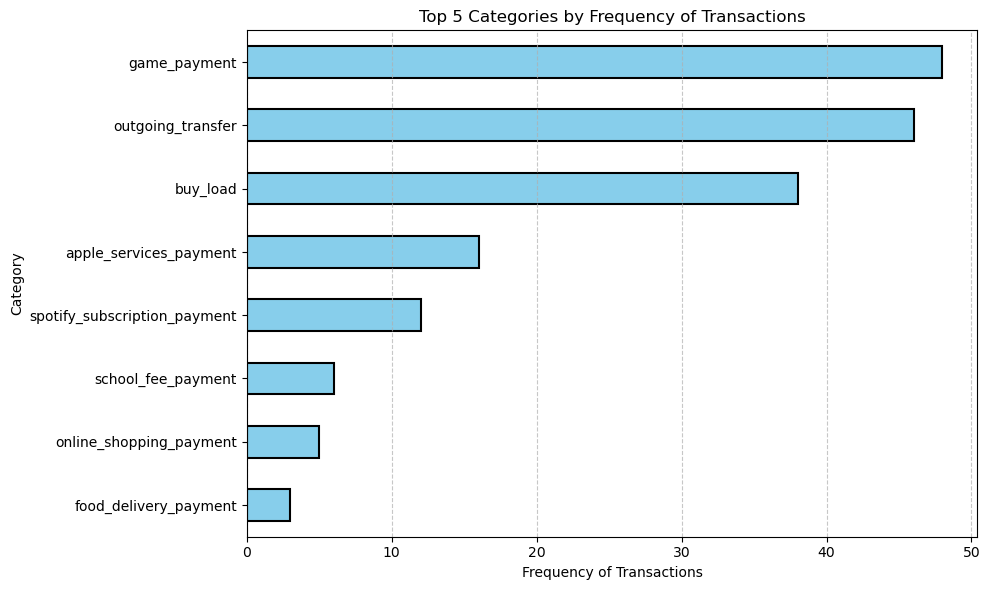

In [134]:
category_summary["frequency"].sort_values(ascending=True).plot(
        kind='barh',
        figsize=(10,6),
        color='skyblue',
        edgecolor='black',
        linewidth=1.5,      
    )

plt.title("Top 5 Categories by Frequency of Transactions")
plt.xlabel("Frequency of Transactions")
plt.ylabel("Category")
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.savefig("figures/spending_by_category.png", dpi=300, bbox_inches='tight')

plt.show()


In [135]:
category_summary["frequency"].sort_values(ascending=False)

Category
game_payment                    48
outgoing_transfer               46
buy_load                        38
apple_services_payment          16
spotify_subscription_payment    12
school_fee_payment               6
online_shopping_payment          5
food_delivery_payment            3
Name: frequency, dtype: int64

## Monthly Spending Trend

In [136]:
df_expenses.head(5)

,Description,Debit,Category,YearMonth,Year,Month,Day,DayOfWeek,DayName,Weekend
1,Transfer from My_Number to Others_Number,200.00,outgoing_transfer,2025-02,2025,2,2,6,Sunday,1
3,Payment to MLBB,94.05,game_payment,2025-02,2025,2,4,1,Tuesday,0
4,Payment to MLBB,94.05,game_payment,2025-02,2025,2,4,1,Tuesday,0
5,Payment to MLBB,94.05,game_payment,2025-02,2025,2,4,1,Tuesday,0
6,Payment to MLBB,94.05,game_payment,2025-02,2025,2,8,5,Saturday,1


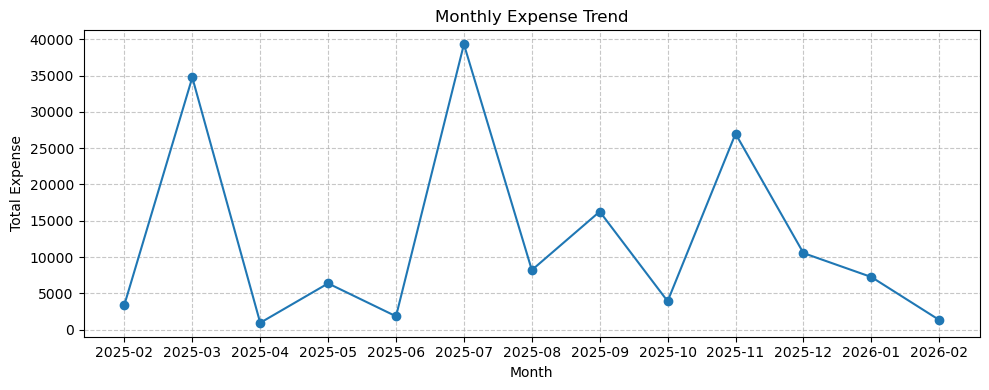

In [137]:
monthly = df_expenses.groupby('YearMonth')['Debit'].sum()

plt.figure(figsize=(10,4))
plt.plot(monthly.index, monthly.values, marker="o")
plt.title("Monthly Expense Trend")
plt.xlabel("Month")
plt.ylabel("Total Expense")
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig("figures/monthly_expense_trend.png", dpi=300, bbox_inches='tight')

plt.show()

In [138]:
df_expenses.groupby('YearMonth')['Debit'].sum()

YearMonth
2025-02     3430.10
2025-03    34738.60
2025-04      941.95
2025-05     6368.05
2025-06     1838.99
2025-07    39308.78
2025-08     8204.96
2025-09    16260.49
2025-10     3914.00
2025-11    26987.10
2025-12    10545.02
2026-01     7248.02
2026-02     1329.00
Name: Debit, dtype: float64

## Monthly Frequency by Category

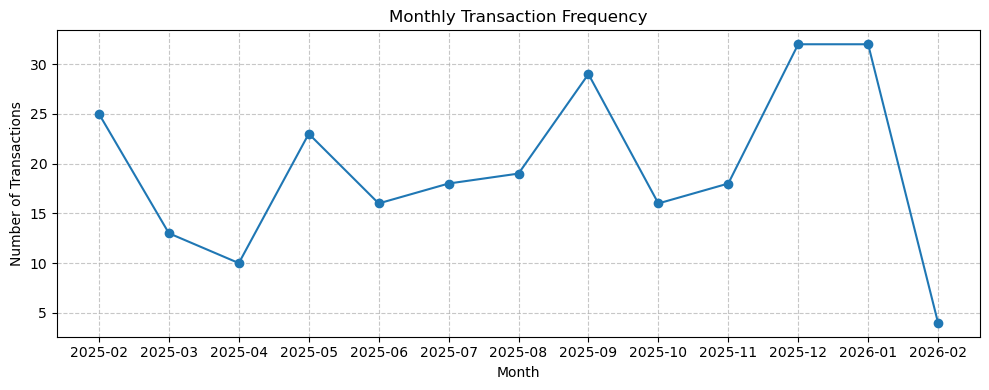

In [139]:
monthly = df.groupby("YearMonth").size()

plt.figure(figsize=(10,4))
plt.plot(monthly.index, monthly.values, marker="o")
plt.title("Monthly Transaction Frequency")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig("figures/monthly_frequency_by_category.png", dpi=300, bbox_inches='tight')

plt.show()


In [140]:
monthly

YearMonth
2025-02    25
2025-03    13
2025-04    10
2025-05    23
2025-06    16
2025-07    18
2025-08    19
2025-09    29
2025-10    16
2025-11    18
2025-12    32
2026-01    32
2026-02     4
dtype: int64

## Expense Distribution (Histogram)

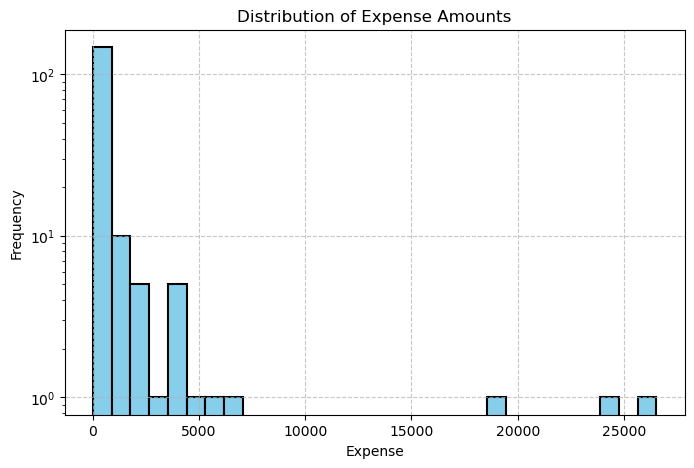

In [141]:
plt.figure(figsize=(8, 5))
plt.hist(df_expenses['Debit'],
        bins=30,
        color='skyblue',
        edgecolor='black',
        linewidth=1.5,       
    )
plt.title("Distribution of Expense Amounts")
plt.xlabel("Expense")
plt.ylabel("Frequency")
plt.yscale('log')
plt.grid(linestyle='--', alpha=0.7)

plt.savefig("figures/distribution_of_expense_amounts.png", dpi=300, bbox_inches='tight')

plt.show()


In [142]:
expenses_count_5000 = df_expenses[df_expenses["Debit"] < 5000].shape[0]
expenses_count_5000_above = df_expenses[df_expenses["Debit"] >= 5000].shape[0]

print(f"Number of expenses below 5000: {expenses_count_5000}")
print(f"Number of expenses 5000 and above: {expenses_count_5000_above}")

Number of expenses below 5000: 168
Number of expenses 5000 and above: 6


In [143]:
expenses_count_100 = df_expenses[df_expenses["Debit"] < 100].value_counts().sum()
expenses_count_101_to_499 = df_expenses[(df_expenses["Debit"] >= 100) & (df_expenses["Debit"] < 500)].value_counts().sum()
expenses_count_500_to_1000 = df_expenses[(df_expenses["Debit"] >= 500) & (df_expenses["Debit"] < 1000)].value_counts().sum()
expenses_count_1001_to_10000 = df_expenses[(df_expenses["Debit"] >= 1000) & (df_expenses["Debit"] < 10000)].value_counts().sum()
expenses_count_10000_and_above = df_expenses[df_expenses["Debit"] >= 10000].value_counts().sum()

print("Small expenses (<100 PHP):", expenses_count_100)
print("Medium expenses (100-499 PHP):", expenses_count_101_to_499)
print("Large expenses (500-999 PHP):", expenses_count_500_to_1000)
print("Very large expenses (1000-9999 PHP):", expenses_count_1001_to_10000)
print("Extremely large expenses (>=10,000 PHP):", expenses_count_10000_and_above)

Small expenses (<100 PHP): 67
Medium expenses (100-499 PHP): 65
Large expenses (500-999 PHP): 17
Very large expenses (1000-9999 PHP): 22
Extremely large expenses (>=10,000 PHP): 3


## Category Distribution (Pie Chart)

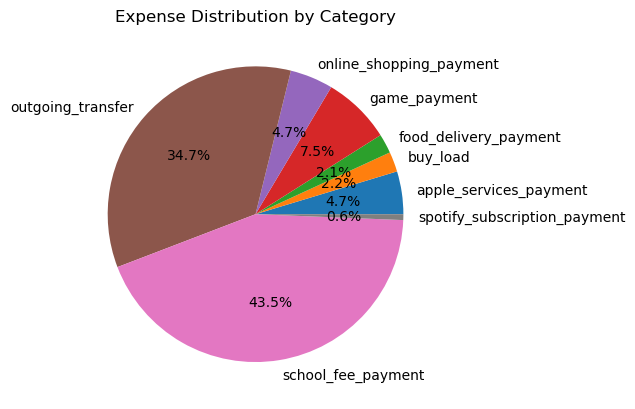

In [144]:
category_summary['total_spending'].plot.pie(autopct='%1.1f%%')
plt.title("Expense Distribution by Category")
plt.ylabel("")

plt.savefig("figures/expense_distribution_by_category.png", dpi=300, bbox_inches='tight')

plt.show()

In [145]:
category_summary['total_spending'].sort_values(ascending=False)

Category
school_fee_payment              70152.00
outgoing_transfer               55857.00
game_payment                    12030.79
online_shopping_payment          7587.02
apple_services_payment           7532.00
buy_load                         3519.00
food_delivery_payment            3413.25
spotify_subscription_payment     1024.00
Name: total_spending, dtype: float64

In [146]:
# convert it in percentage
category_summary['total_spending_percentage'] = (category_summary['total_spending'] / category_summary['total_spending'].sum()) * 100
category_summary['total_spending_percentage'].sort_values(ascending=False)

Category
school_fee_payment              43.541553
outgoing_transfer               34.669012
game_payment                     7.467204
online_shopping_payment          4.709069
apple_services_payment           4.674920
buy_load                         2.184153
food_delivery_payment            2.118517
spotify_subscription_payment     0.635571
Name: total_spending_percentage, dtype: float64

## Top 5 Highest Expenses

In [147]:
df_expenses.nlargest(5, 'Debit')[['YearMonth','Category','Debit']]


,YearMonth,Category,Debit
27,2025-03,school_fee_payment,26523.6
94,2025-07,school_fee_payment,24039.6
172,2025-11,school_fee_payment,18763.8
104,2025-07,outgoing_transfer,7000.0
117,2025-08,outgoing_transfer,5700.0


## Highest Spending Month

In [148]:
df_expenses.groupby('YearMonth')['Debit'].sum().idxmax(), df_expenses.groupby('YearMonth')['Debit'].sum().max()


('2025-07', 39308.78)

## Most Frequent Category

In [149]:
df_expenses['Category'].value_counts().idxmax(), df_expenses['Category'].value_counts().max()


('game_payment', 48)

## ANOVA: Differences Accross Spending Categories

In [150]:
df_expenses.groupby('Category')['Debit'].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
apple_services_payment,16.0,470.750000,335.822274,49.00,164.250,549.000,649.000,999.00
buy_load,38.0,92.605263,60.150954,22.00,55.500,61.000,114.000,249.00
food_delivery_payment,3.0,1137.750000,995.617239,111.00,657.125,1203.250,1651.125,2099.00
game_payment,48.0,250.641458,231.140710,10.64,94.050,185.875,280.000,1028.96
online_shopping_payment,5.0,1517.404000,2141.306054,190.00,303.000,349.020,1521.000,5224.00
outgoing_transfer,46.0,1214.282609,1667.505011,30.00,138.000,300.000,1835.000,7000.00
school_fee_payment,6.0,11692.000000,12755.999440,99.00,294.500,9631.900,22720.650,26523.60
spotify_subscription_payment,12.0,85.333333,26.721912,75.00,75.000,75.000,85.000,169.00


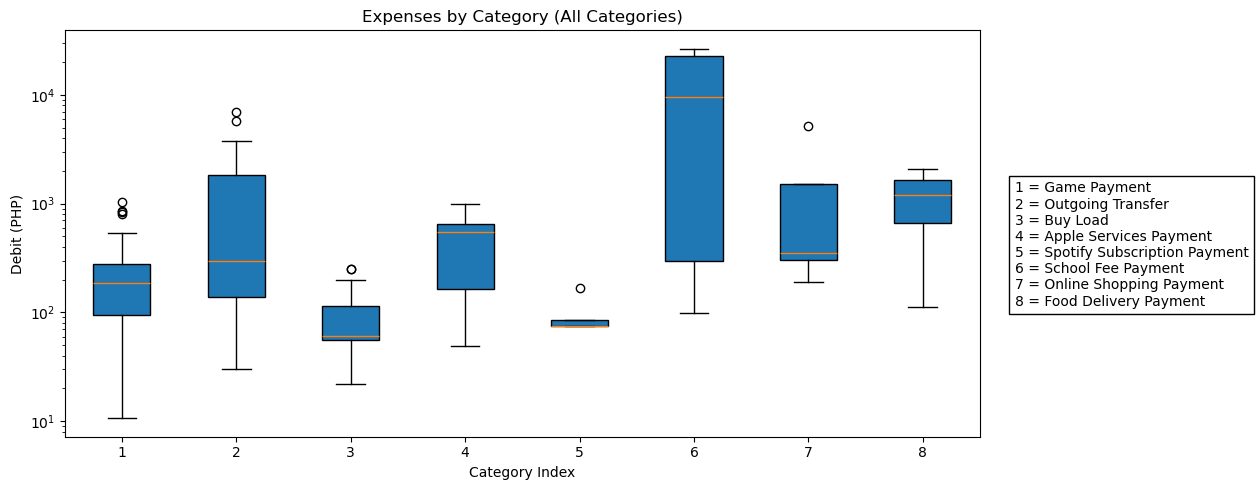

In [151]:
groups = [
    df_expenses[df_expenses["Category"] == cat]["Debit"]
    for cat in df_expenses['Category'].value_counts().index
]

plt.figure(figsize=(10,5))

bp = plt.boxplot(groups, patch_artist=True)

plt.yscale("log")

plt.xticks(range(1, len(df_expenses['Category'].value_counts().index)+1))
plt.xlabel("Category Index")
plt.ylabel("Debit (PHP)")
plt.title("Expenses by Category (All Categories)")

# Create index legend text
legend_text = "\n".join(
    [f"{i+1} = {cat.replace('_',' ').title()}"
     for i, cat in enumerate(df_expenses['Category'].value_counts().index)]
)

# Place legend on the RIGHT SIDE
plt.gcf().text(
    1.02, 0.5,
    legend_text,
    va="center",
    fontsize=10,
    bbox=dict(facecolor="white", edgecolor="black")
)

plt.tight_layout()

plt.savefig("figures/category_boxplot.png", dpi=300, bbox_inches='tight')

plt.show()


In [152]:
outgoing_transfer_group = df_expenses[df_expenses["Category"] == "outgoing_transfer"]["Debit"]
game_payment_group = df_expenses[df_expenses["Category"] == "game_payment"]["Debit"]
buy_load_group = df_expenses[df_expenses["Category"] == "buy_load"]["Debit"]
spotify_group = df_expenses[df_expenses["Category"] == "spotify_subscription_payment"]["Debit"]
school_fee_group = df_expenses[df_expenses["Category"] == "school_fee_payment"]["Debit"]
apple_services_group = df_expenses[df_expenses["Category"] == "apple_services_payment"]["Debit"]
online_shopping_group = df_expenses[df_expenses["Category"] == "online_shopping_payment"]["Debit"]
food_delivery_group = df_expenses[df_expenses["Category"] == "food_delivery_payment"]["Debit"]

In [153]:
f_stat, p_val = f_oneway(
    outgoing_transfer_group,
    game_payment_group,
    buy_load_group,
    spotify_group,
    school_fee_group,
    apple_services_group,
    online_shopping_group,
    food_delivery_group
)

print("F-statistic:", f_stat)
print("p-value:", p_val)

print()

alpha = 0.05
if p_val < alpha:
    print("Significant difference found (Reject H02)")
else:
    print("No significant difference found (Fail to reject H02)")

F-statistic: 18.738379896542018
p-value: 2.734898808045962e-18

Significant difference found (Reject H02)


## Correlation: Heatmap

In [154]:
df_expenses["Category_code"] = df_expenses["Category"].astype("category").cat.codes
df_expenses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, 1 to 254
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Description    174 non-null    object 
 1   Debit          174 non-null    float64
 2   Category       174 non-null    object 
 3   YearMonth      174 non-null    object 
 4   Year           174 non-null    int32  
 5   Month          174 non-null    int32  
 6   Day            174 non-null    int32  
 7   DayOfWeek      174 non-null    int32  
 8   DayName        174 non-null    object 
 9   Weekend        174 non-null    int64  
 10  Category_code  174 non-null    int8   
dtypes: float64(1), int32(4), int64(1), int8(1), object(4)
memory usage: 12.4+ KB


In [155]:
df_expenses_encoded = pd.get_dummies(df_expenses, columns=["Category"], drop_first=True)
df_expenses_encoded.head(5)

,Description,Debit,YearMonth,Year,Month,Day,DayOfWeek,DayName,Weekend,Category_code,Category_buy_load,Category_food_delivery_payment,Category_game_payment,Category_online_shopping_payment,Category_outgoing_transfer,Category_school_fee_payment,Category_spotify_subscription_payment
1,Transfer from My_Number to Others_Number,200.00,2025-02,2025,2,2,6,Sunday,1,5,False,False,False,False,True,False,False
3,Payment to MLBB,94.05,2025-02,2025,2,4,1,Tuesday,0,3,False,False,True,False,False,False,False
4,Payment to MLBB,94.05,2025-02,2025,2,4,1,Tuesday,0,3,False,False,True,False,False,False,False
5,Payment to MLBB,94.05,2025-02,2025,2,4,1,Tuesday,0,3,False,False,True,False,False,False,False
6,Payment to MLBB,94.05,2025-02,2025,2,8,5,Saturday,1,3,False,False,True,False,False,False,False


In [156]:
cols = [
    "Category_code",
    "Category_buy_load",
    "Category_food_delivery_payment",
    "Category_game_payment",
    "Category_online_shopping_payment",
    "Category_outgoing_transfer",
    "Category_school_fee_payment",
    "Category_spotify_subscription_payment"
]

df_expenses_encoded[cols] = df_expenses_encoded[cols].astype(int)
df_expenses_encoded.head(5)

,Description,Debit,YearMonth,Year,Month,Day,DayOfWeek,DayName,Weekend,Category_code,Category_buy_load,Category_food_delivery_payment,Category_game_payment,Category_online_shopping_payment,Category_outgoing_transfer,Category_school_fee_payment,Category_spotify_subscription_payment
1,Transfer from My_Number to Others_Number,200.00,2025-02,2025,2,2,6,Sunday,1,5,0,0,0,0,1,0,0
3,Payment to MLBB,94.05,2025-02,2025,2,4,1,Tuesday,0,3,0,0,1,0,0,0,0
4,Payment to MLBB,94.05,2025-02,2025,2,4,1,Tuesday,0,3,0,0,1,0,0,0,0
5,Payment to MLBB,94.05,2025-02,2025,2,4,1,Tuesday,0,3,0,0,1,0,0,0,0
6,Payment to MLBB,94.05,2025-02,2025,2,8,5,Saturday,1,3,0,0,1,0,0,0,0


In [157]:
df_expenses_numeric = df_expenses_encoded.select_dtypes(include=[np.number])
df_expenses_numeric.head(5)

,Debit,Year,Month,Day,DayOfWeek,Weekend,Category_code,Category_buy_load,Category_food_delivery_payment,Category_game_payment,Category_online_shopping_payment,Category_outgoing_transfer,Category_school_fee_payment,Category_spotify_subscription_payment
1,200.00,2025,2,2,6,1,5,0,0,0,0,1,0,0
3,94.05,2025,2,4,1,0,3,0,0,1,0,0,0,0
4,94.05,2025,2,4,1,0,3,0,0,1,0,0,0,0
5,94.05,2025,2,4,1,0,3,0,0,1,0,0,0,0
6,94.05,2025,2,8,5,1,3,0,0,1,0,0,0,0


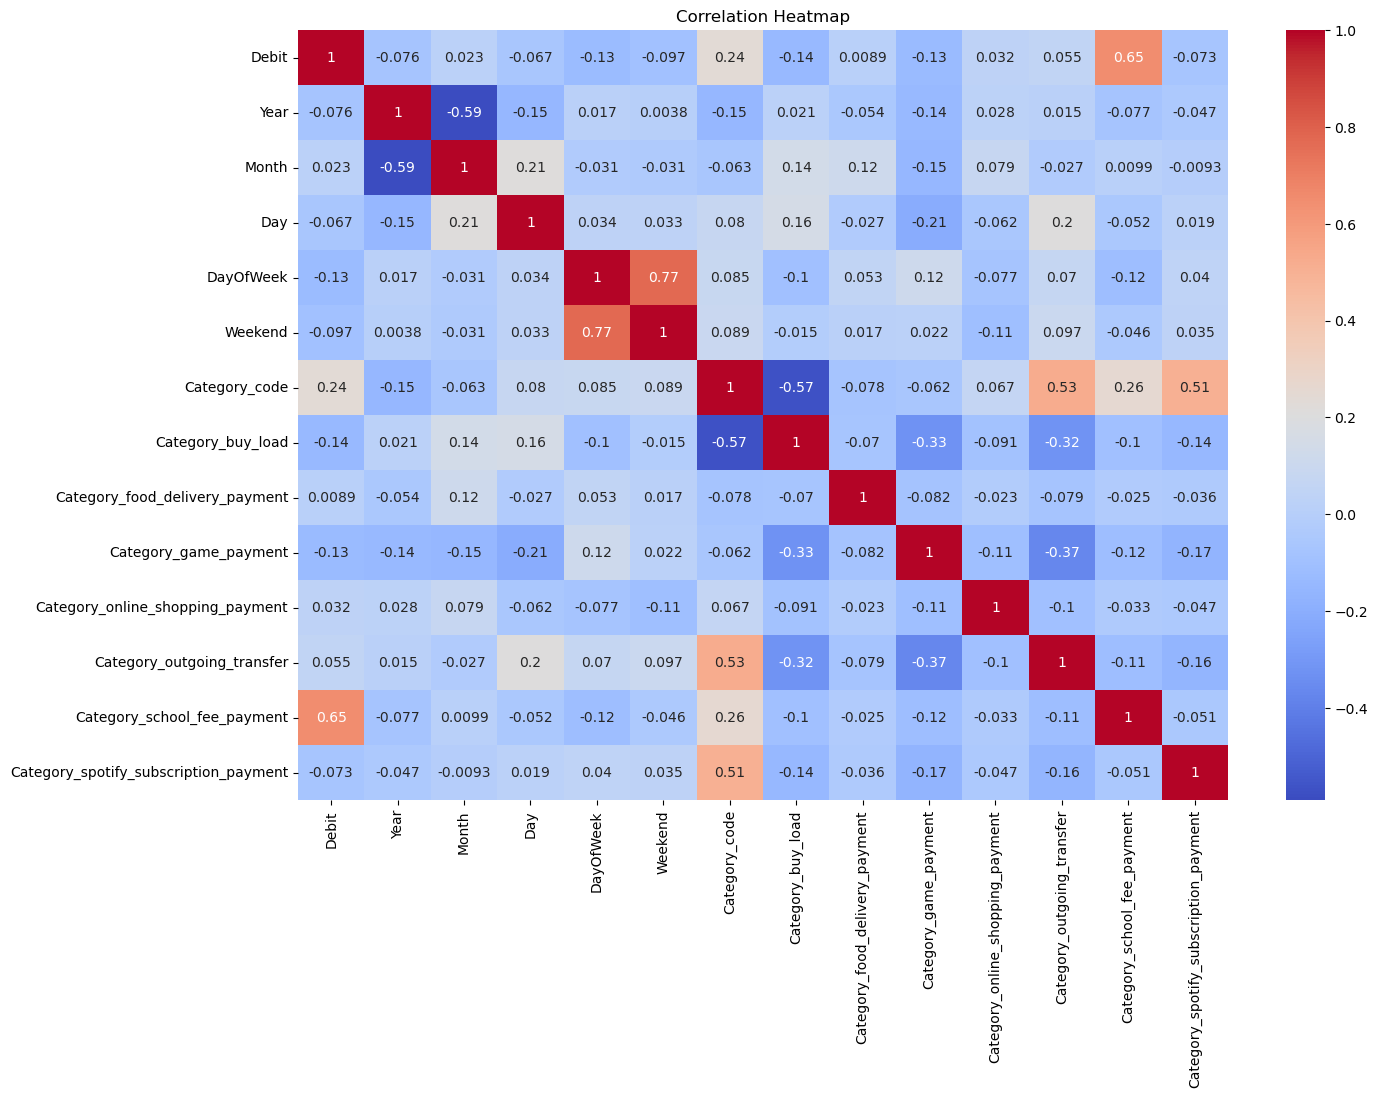

In [158]:
corr = df_expenses_numeric.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr.select_dtypes(include=["number"]), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.savefig("figures/correlation_heatmap.png", dpi=300, bbox_inches='tight')

plt.show()


In [159]:
df_expenses_numeric.corr()

,Debit,Year,Month,Day,DayOfWeek,Weekend,Category_code,Category_buy_load,Category_food_delivery_payment,Category_game_payment,Category_online_shopping_payment,Category_outgoing_transfer,Category_school_fee_payment,Category_spotify_subscription_payment
Debit,1.000000,-0.075836,0.023097,-0.067459,-0.125601,-0.096645,0.238946,-0.139919,0.008911,-0.132394,0.032314,0.054904,0.646261,-0.072671
Year,-0.075836,1.000000,-0.590107,-0.152983,0.016813,0.003792,-0.153729,0.021424,-0.054255,-0.142844,0.027619,0.014520,-0.077410,-0.046823
Month,0.023097,-0.590107,1.000000,0.211768,-0.030891,-0.031178,-0.063313,0.137072,0.115745,-0.151290,0.078898,-0.027324,0.009863,-0.009335
Day,-0.067459,-0.152983,0.211768,1.000000,0.034160,0.033239,0.080355,0.155025,-0.026773,-0.208832,-0.061914,0.204963,-0.052402,0.019131
DayOfWeek,-0.125601,0.016813,-0.030891,0.034160,1.000000,0.770466,0.084901,-0.101990,0.053049,0.116382,-0.076935,0.069949,-0.116572,0.039783
Weekend,-0.096645,0.003792,-0.031178,0.033239,0.770466,1.000000,0.088531,-0.015025,0.017032,0.021825,-0.106164,0.096523,-0.046171,0.034997
Category_code,0.238946,-0.153729,-0.063313,0.080355,0.084901,0.088531,1.000000,-0.570881,-0.078230,-0.062493,0.066759,0.526042,0.258315,0.505207
Category_buy_load,-0.139919,0.021424,0.137072,0.155025,-0.101990,-0.015025,-0.570881,1.000000,-0.070014,-0.326255,-0.090921,-0.316881,-0.099895,-0.143865
Category_food_delivery_payment,0.008911,-0.054255,0.115745,-0.026773,0.053049,0.017032,-0.078230,-0.070014,1.000000,-0.081752,-0.022783,-0.079403,-0.025031,-0.036049
Category_game_payment,-0.132394,-0.142844,-0.151290,-0.208832,0.116382,0.021825,-0.062493,-0.326255,-0.081752,1.000000,-0.106164,-0.370006,-0.116642,-0.167984


# Finalize and Save the Dataset

In [160]:
df_expenses_encoded.drop(columns=["Description"]).head(5)

,Debit,YearMonth,Year,Month,Day,DayOfWeek,DayName,Weekend,Category_code,Category_buy_load,Category_food_delivery_payment,Category_game_payment,Category_online_shopping_payment,Category_outgoing_transfer,Category_school_fee_payment,Category_spotify_subscription_payment
1,200.00,2025-02,2025,2,2,6,Sunday,1,5,0,0,0,0,1,0,0
3,94.05,2025-02,2025,2,4,1,Tuesday,0,3,0,0,1,0,0,0,0
4,94.05,2025-02,2025,2,4,1,Tuesday,0,3,0,0,1,0,0,0,0
5,94.05,2025-02,2025,2,4,1,Tuesday,0,3,0,0,1,0,0,0,0
6,94.05,2025-02,2025,2,8,5,Saturday,1,3,0,0,1,0,0,0,0


In [161]:
df_expenses_encoded.to_csv("personal_gcash_transaction_final.csv", index=False)